In [ ]:
import sqlite3
db = sqlite3.connect('Employee.sqlite')
cur = db.cursor()
cur.execute('create table EmployeeDetail (employeeid int Primary Key, name Text, age int, department Text, salary int);')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IMDB.sqlite to IMDB.sqlite


In [ ]:
values = [(101, 'Aadarsh', 25, 'Marketing', 50000), (102, 'Aarti', 27, 'Operations', 60000), 
          (103, 'Siddharth',25,'Finance',85000), (104, 'Aman', 24, 'Human Resource', 75000),
          (105, 'Amit', 30, 'Marketing', 50000), (106, 'Shivansh', 26, 'IT', 90000), 
          (107, 'Vaibhav', 23, 'Finance', 85000), (108, 'Himanshu', 26, 'IT', 90000),
          (109, 'Raman' ,25, 'Operations', 60000), (110, 'Kunal', 26, 'Marketing', 50000),
          (111, 'Adhira', 29, 'Human Resource', 75000), (112, 'Tanya', 24, 'Marketing', 50000)]

cur.executemany('insert into EmployeeDetail values (?,?,?,?,?)', values)
db.commit()

In [ ]:
Cursor = cur.execute('select * from EmployeeDetail;')
for row in Cursor :
    print(row)

(101, 'Aadarsh', 25, 'Marketing', 50000)
(102, 'Aarti', 27, 'Operations', 60000)
(103, 'Siddharth', 25, 'Finance', 85000)
(104, 'Aman', 24, 'Human Resource', 75000)
(105, 'Amit', 30, 'Marketing', 50000)
(106, 'Shivansh', 26, 'IT', 90000)
(107, 'Vaibhav', 23, 'Finance', 85000)
(108, 'Himanshu', 26, 'IT', 90000)
(109, 'Raman', 25, 'Operations', 60000)
(110, 'Kunal', 26, 'Marketing', 50000)
(111, 'Adhira', 29, 'Human Resource', 75000)
(112, 'Tanya', 24, 'Marketing', 50000)


In [ ]:
cur.execute('select employeeid from EmployeeDetail where department = "Finance";')
ans = cur.fetchall()
for row in ans :
    print(row[0])

103
107


In [ ]:
out = cur.execute('select department, count(*) from EmployeeDetail group by department;')
db.commit()

In [ ]:
for row in out :
    print(row[0],row[1])

Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


In [ ]:
import pandas as pd
data = pd.read_sql_query("select * from EmployeeDetail;",db)
data

,employeeid,name,age,department,salary
0,101,Aadarsh,25,Marketing,50000
1,102,Aarti,27,Operations,60000
2,103,Siddharth,25,Finance,85000
3,104,Aman,24,Human Resource,75000
4,105,Amit,30,Marketing,50000
5,106,Shivansh,26,IT,90000
6,107,Vaibhav,23,Finance,85000
7,108,Himanshu,26,IT,90000
8,109,Raman,25,Operations,60000
9,110,Kunal,26,Marketing,50000


In [ ]:
DB = sqlite3.connect("IMDB.sqlite")
Cur = db.cursor()

In [ ]:
SqlD = pd.read_sql_query("select * from Genre;",DB)
SqlD

,Movie_id,genre
0,36809,Biography
1,30114,Adventure
2,37367,Comedy
3,49473,Comedy
4,14867,Drama
...,...,...
346,38262,
347,10023,Comedy
348,27783,Sci-Fi
349,42294,Sci-Fi


In [ ]:
db = sqlite3.connect("IMDB.sqlite")
cur = db.cursor()
genre_df = pd.read_sql_query('select * from genre' , db)
genre_mod_df = genre_df[genre_df['genre'] != '']
genre_mod_df.to_sql("genre_mod", db , if_exists = "replace")
cur.execute('select genre , count(*) from genre_mod group by genre')
for row in cur:
    l = [row[0] , row[1]]
    print(l[0] , l[1])

Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


In [ ]:
db = sqlite3.connect("IMDB.sqlite")
cur = db.cursor()
imdb = pd.read_sql_query('select * from IMDB;', db)
earn = pd.read_sql_query('select * from earning;', db)
earn['total_earning'] = earn['Domestic'] + earn['Worldwide']
index = earn.total_earning.idxmax()
movie_id = imdb['Movie_id'].iloc[index]
loc = imdb.Rating.loc[imdb['Movie_id'] == movie_id]
print(loc.values[0])

8.1


In [ ]:
DB = sqlite3.connect("IMDB.sqlite")
Cur = DB.cursor()
imdb = pd.read_sql_query('select * from IMDB;', DB)
imdb

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,83070,27231,9603,4021,2420,1785,4739,313823,82012,1837,1363,457,200910,153669,45301,138762,112943,23895,29252,23072,5726,664,53328,224519.0,8.1,8.1,8.4,8.4,8.5,8.2,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,78451,28394,9403,3796,1930,1161,2059,212866,44600,745,567,170,133336,106007,26152,102120,86609,14304,14895,12400,2261,649,38478,169745.0,7.6,7.6,7.9,7.9,7.9,7.7,7.8,7.7,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,71485,24252,7545,2381,1109,634,1202,188925,58348,506,348,153,132350,96269,34765,94745,75394,18163,12829,9912,2681,555,46947,147849.0,7.7,7.7,7.9,7.9,7.9,7.8,7.8,7.7,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,45487,16542,5673,2210,1084,664,1182,126718,58098,654,325,321,92940,57778,34126,67477,50212,16222,13973,10690,3026,475,20450,111670.0,7.8,7.9,8.2,8.1,8.3,8.0,8.0,8.0,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,14187,5945,2585,1188,710,534,995,49808,16719,121,95,24,28593,20107,8167,28691,21990,6269,7425,5803,1490,391,7959,46138.0,7.8,7.9,8.6,8.7,8.5,8.0,8.0,7.9,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,38262,Whiplash (2014),8.5,492285,88,3300000.0,107 min,110404,161864,132656,56007,16577,6031,2937,1859,1263,2723,308900,71066,2878,2200,660,205839,161853,41944,123712,102839,19018,23345,19072,3812,590,49868,213952.0,8.5,8.4,9.0,9.1,8.9,8.6,8.7,8.5,8.3,8.3,8.2,8.1,8.1,8.2,8.7,8.0,8.6,8.4
113,10023,Wreck-It Ralph (2012),7.7,295125,72,165000000.0,,41980,50262,96477,67934,24894,7748,2724,1190,703,1226,190983,50202,1663,1182,467,120962,90759,29003,90203,74767,14148,13706,11356,2112,614,44962,129487.0,7.7,7.8,7.9,7.9,8.0,7.9,7.9,7.9,7.6,7.6,7.7,7.4,7.4,7.5,7.4,7.2,7.9,7.6
114,27783,X-Men: Days of Future Past (2014),8.0,560736,74,200000000.0,132 min,91765,127521,183578,104658,33027,10059,3710,1903,1225,3301,370835,71008,3038,2403,614,220178,179039,39094,158607,135392,20927,26834,22460,3884,710,67889,229049.0,8.0,8.1,8.4,8.4,8.6,8.1,8.1,8.2,7.8,7.8,8.0,7.7,7.7,7.9,7.5,7.4,8.1,7.9
115,42294,X-Men: First Class (2011),7.8,556713,65,160000000.0,132 min,64428,96219,200144,129352,41945,12861,4799,2349,1448,3182,382107,80444,2075,1612,443,223309,176821,44428,185909,157332,26094,30217,25051,4691,780,87542,257681.0,7.7,7.9,8.0,7.9,8.3,7.9,7.9,8.0,7.7,7.6,7.8,7.6,7.5,7.7,7.6,7.3,7.8,7.7


In [ ]:
DB = sqlite3.connect("IMDB.sqlite")
Cur = DB.cursor()
imdb = pd.read_sql_query("select * from IMDB;", DB)
index = imdb.TotalVotes.idxmax()
movie = imdb['Title'].iloc[index]
rating = imdb['Rating'].iloc[index]
print(movie, rating)

Inception (2010) 8.8


In [ ]:
DB = sqlite3.connect("IMDB.sqlite")
cur = DB.cursor()
imdb = pd.read_sql_query("select * from IMDB;", DB)

def gettime(time) :
    return int(time.split(' ')[0])

imdb['Runtime'].replace('', '0', inplace = True)
imdb['Runtime'] = imdb['Runtime'].apply(gettime) 

Run_index = imdb.Runtime.idxmax()
movie = imdb['Title'].iloc[Run_index]
runtime = imdb['Runtime'].iloc[Run_index]

print(movie, runtime)

The Wolf of Wall Street (2013) 180


In [ ]:
db = sqlite3.connect("IMDB.sqlite")
cur = db.cursor()
imdb = pd.read_sql_query("select * from IMDB;", db)
earn = pd.read_sql_query("select * from earning;", db)

df = pd.merge(imdb, earn, on = 'Movie_id')
df['Domestic'].replace('',0,inplace = True)
df['Worldwide'].replace('',0,inplace = True)

def getINT(val) :
    return int(val)

df['Budget'].replace('', '0', inplace = True)
df['Budget'] = df['Budget'].apply(getINT)

df['Net_Profit'] = df['Domestic'] + df['Worldwide'] - df['Budget']
index = df.Net_Profit.idxmax()
movie = df.Title.iloc[index]
print(movie)

Star Wars: The Force Awakens (2015)


In [ ]:
db = sqlite3.connect("IMDB.sqlite")
cur = db.cursor()
imdb = pd.read_sql_query("select * from IMDB;", db)
earn = pd.read_sql_query("select * from earning;", db)
df = pd.merge(imdb, earn, on = 'Movie_id')
df['Domestic'].replace('', 0, inplace = True)
df['Worldwide'].replace('', 0, inplace = True)

def Gint(val) :
    return int(val)

df['Budget'].replace('','0', inplace = True)
df['Budget'] = df['Budget'].apply(Gint)

df = df[df['Budget'] != 0]
df = df[df['Budget'] == df['Budget'].min()]
df['Net_Profit'] = df['Domestic'] + df['Worldwide'] - df['Budget']

index = df.Net_Profit.idxmax()
Movie = df.Title.loc[index]
print(Movie)

Short Term 12 (2013)


In [ ]:
import numpy as np
db = sqlite3.connect("IMDB.sqlite")
imdb = pd.read_sql_query("select * from IMDB;", db)
earn = pd.read_sql_query("select * from earning;", db)
data=pd.read_sql_query('select imdb.title, earning.domestic, earning.worldwide from imdb join earning on imdb.movie_id=earning.movie_id;', db)
df=data.copy()
df['Gross']=df.Domestic+df.Worldwide
name=[]
year=[]
for i in df.Title:
    year.append(i[len(i)-5:len(i)-1])
    name.append(i[:len(i)-6].strip())
np_name=np.array(name)
np_year=np.array(year, dtype='int')
df['Year']=np_year
df['Name']=np_name
list_of_years=list(set(np_year))
list_of_years=np.sort(list_of_years)
for i in list_of_years:
    print(i, df.Title[np.argmax(df[df.Year==i].Gross)])

2010 Captain Fantastic (2016)
2011 Arrival (2016)
2012 Birdman or (The Unexpected Virtue of Ignorance) (2014)
2013 Captain Phillips (2013)
2014 Birdman or (The Unexpected Virtue of Ignorance) (2014)
2015 Before Midnight (2013)
2016 Captain Fantastic (2016)


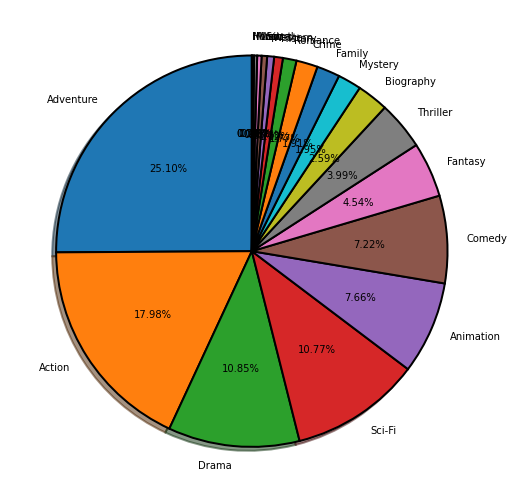

Adventure 25.10
Action 17.98
Drama 10.85
Sci-Fi 10.77
Animation 7.66
Comedy 7.22
Fantasy 4.54
Thriller 3.99
Biography 2.59
Mystery 1.95
Family 1.91
Crime 1.77
Romance 1.12
History 0.72
Western 0.57
Sport 0.46
War 0.36
Musical 0.25
Music 0.15
Horror 0.03


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db = sqlite3.connect("IMDB.sqlite")
data = pd.read_sql_query("select imdb.Budget, genre.genre from imdb join genre on imdb.Movie_id = genre.Movie_id; ", db)
df = data.copy()
df = df[df.genre != '']
df['Budget'].replace('', 0, inplace = True)
gen_budget = df.groupby('genre')['Budget'].sum().sort_values(ascending = False)
genre = gen_budget.index
budget = gen_budget.values
plt.rcParams['figure.figsize'] = (15,9)
plt.pie(budget, labels = genre ,autopct='%.2f%%', startangle=90 ,shadow=True, wedgeprops = {'linewidth':2,'edgecolor':"black"})
plt.show()
percent = np.true_divide(budget , budget.sum())*100
for i in range(len(percent)):
    print(genre[i] , format(percent[i] , '.2f'))

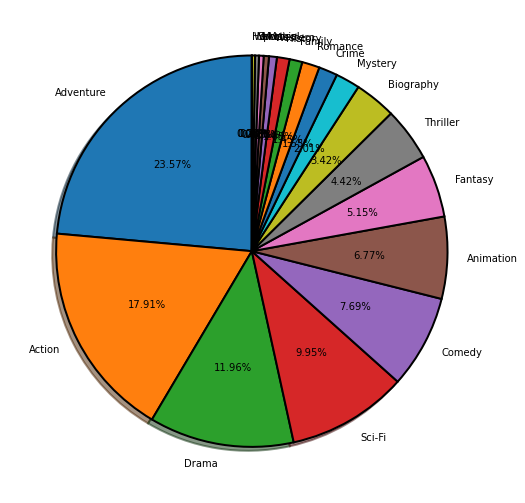

Adventure 23.57
Action 17.91
Drama 11.96
Sci-Fi 9.95
Comedy 7.69
Animation 6.77
Fantasy 5.15
Thriller 4.42
Biography 3.42
Mystery 2.01
Crime 1.55
Romance 1.45
Family 1.05
History 1.04
Western 0.65
Music 0.43
Musical 0.38
Sport 0.32
War 0.25
Horror 0.01


In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
db = sqlite3.connect("IMDB.sqlite")
data = pd.read_sql_query("select genre.genre, earning.Domestic, earning.Worldwide from genre join earning on genre.Movie_id = earning.Movie_id", db)
df = data.copy()
df = df[df.genre != '']
df['Net_total'] = df['Domestic'] + df['Worldwide']
genre_earn = df.groupby('genre')['Net_total'].sum().sort_values(ascending = False)
genre = genre_earn.index
earning = genre_earn.values
plt.rcParams['figure.figsize'] = (15,9)
plt.pie(earning,labels = genre,autopct='%.2f%%' , startangle=90 ,shadow=True, wedgeprops = { 'linewidth':2,'edgecolor':"black" })
plt.show()
percent = np.true_divide(earning , earning.sum())*100
for i in range(len(percent)):
    print(genre[i] , format(percent[i] , '.2f'))

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db = sqlite3.connect("IMDB.sqlite")
data = pd.read_sql_query("select imdb.Title, genre.genre, genre.Movie_id from imdb join genre on imdb.Movie_id=genre.Movie_id where imdb.rating >= 8; ", db)
df = data.copy()
S = set()
Val = df.shape[0]
for i in range(Val) :
    if df.genre[i] == 'Mystery' or df.genre[i] == 'Sci-Fi':
        if df.Movie_id[i] in S:
            print(df.Title[i])
        else:
            S.add(df.Movie_id[i])

Arrival (2016)
